### Multilayer perceptron

In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2.2.0


In [2]:
import pandas as pd


In [3]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [4]:
#import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
# Read the dataset
data = pd.read_csv("./data_all_dfeatures.csv")

In [6]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [7]:
tf.__version__

'2.2.0'

In [8]:
num_classes = 2

In [9]:
from tensorflow.keras.layers import PReLU

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [11]:
from matplotlib import pyplot

In [12]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model8():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(130,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [14]:
model8 = create_model8()
model8.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               67072     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________


In [15]:
model8.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test),
           batch_size=500)

Epoch 1/600
282/282 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.8315 - val_loss: 0.1300 - val_accuracy: 0.8478
Epoch 2/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.8921 - val_loss: 0.1131 - val_accuracy: 0.8711
Epoch 3/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.8957 - val_loss: 0.1088 - val_accuracy: 0.8733
Epoch 4/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.8983 - val_loss: 0.1141 - val_accuracy: 0.8630
Epoch 5/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.8994 - val_loss: 0.1345 - val_accuracy: 0.8273
Epoch 6/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9010 - val_loss: 0.1152 - val_accuracy: 0.8607
Epoch 7/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0790 - accuracy: 0.9011 - val_loss: 0.1127 - val_accuracy: 0.8647

Epoch 58/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9134 - val_loss: 0.1339 - val_accuracy: 0.8302
Epoch 59/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9136 - val_loss: 0.1236 - val_accuracy: 0.8506
Epoch 60/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9144 - val_loss: 0.1240 - val_accuracy: 0.8485
Epoch 61/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9150 - val_loss: 0.1200 - val_accuracy: 0.8555
Epoch 62/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9145 - val_loss: 0.1160 - val_accuracy: 0.8627
Epoch 63/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9148 - val_loss: 0.1194 - val_accuracy: 0.8591
Epoch 64/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9157 - val_loss: 0.1267 - val_accuracy:

Epoch 115/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9200 - val_loss: 0.1161 - val_accuracy: 0.8679
Epoch 116/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0656 - accuracy: 0.9192 - val_loss: 0.1181 - val_accuracy: 0.8642
Epoch 117/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9201 - val_loss: 0.1263 - val_accuracy: 0.8483
Epoch 118/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9197 - val_loss: 0.1344 - val_accuracy: 0.8345
Epoch 119/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9187 - val_loss: 0.1204 - val_accuracy: 0.8595
Epoch 120/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9188 - val_loss: 0.1175 - val_accuracy: 0.8640
Epoch 121/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9209 - val_loss: 0.1167 - val_ac

282/282 [==============================] - 1s 4ms/step - loss: 0.0634 - accuracy: 0.9215 - val_loss: 0.1276 - val_accuracy: 0.8450
Epoch 172/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0622 - accuracy: 0.9234 - val_loss: 0.1167 - val_accuracy: 0.8660
Epoch 173/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9228 - val_loss: 0.1386 - val_accuracy: 0.8271
Epoch 174/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9227 - val_loss: 0.1327 - val_accuracy: 0.8358
Epoch 175/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9231 - val_loss: 0.1262 - val_accuracy: 0.8529
Epoch 176/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9221 - val_loss: 0.1166 - val_accuracy: 0.8701
Epoch 177/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0631 - accuracy: 0.9224 - val_loss: 0.1174 - val_accuracy: 0.8675

282/282 [==============================] - 1s 4ms/step - loss: 0.0620 - accuracy: 0.9234 - val_loss: 0.1332 - val_accuracy: 0.8384
Epoch 228/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9253 - val_loss: 0.1288 - val_accuracy: 0.8451
Epoch 229/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.9239 - val_loss: 0.1213 - val_accuracy: 0.8600
Epoch 230/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9250 - val_loss: 0.1258 - val_accuracy: 0.8539
Epoch 231/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9252 - val_loss: 0.1239 - val_accuracy: 0.8572
Epoch 232/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9245 - val_loss: 0.1233 - val_accuracy: 0.8558
Epoch 233/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0613 - accuracy: 0.9251 - val_loss: 0.1301 - val_accuracy: 0.8426

282/282 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9265 - val_loss: 0.1351 - val_accuracy: 0.8356
Epoch 284/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9256 - val_loss: 0.1299 - val_accuracy: 0.8433
Epoch 285/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9252 - val_loss: 0.1189 - val_accuracy: 0.8655
Epoch 286/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9262 - val_loss: 0.1355 - val_accuracy: 0.8346
Epoch 287/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9265 - val_loss: 0.1154 - val_accuracy: 0.8740
Epoch 288/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9264 - val_loss: 0.1263 - val_accuracy: 0.8504
Epoch 289/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9264 - val_loss: 0.1188 - val_accuracy: 0.8699

282/282 [==============================] - 1s 4ms/step - loss: 0.0597 - accuracy: 0.9271 - val_loss: 0.1250 - val_accuracy: 0.8577
Epoch 340/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9275 - val_loss: 0.1411 - val_accuracy: 0.8264
Epoch 341/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9257 - val_loss: 0.1248 - val_accuracy: 0.8558
Epoch 342/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9268 - val_loss: 0.1285 - val_accuracy: 0.8486
Epoch 343/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9272 - val_loss: 0.1222 - val_accuracy: 0.8597
Epoch 344/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9267 - val_loss: 0.1219 - val_accuracy: 0.8586
Epoch 345/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9271 - val_loss: 0.1230 - val_accuracy: 0.8596

282/282 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9277 - val_loss: 0.1419 - val_accuracy: 0.8244
Epoch 396/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9287 - val_loss: 0.1224 - val_accuracy: 0.8598
Epoch 397/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9285 - val_loss: 0.1331 - val_accuracy: 0.8421
Epoch 398/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9288 - val_loss: 0.1287 - val_accuracy: 0.8491
Epoch 399/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9256 - val_loss: 0.1277 - val_accuracy: 0.8511
Epoch 400/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9274 - val_loss: 0.1199 - val_accuracy: 0.8626
Epoch 401/600
282/282 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9285 - val_loss: 0.1451 - val_accuracy: 0.8159

282/282 [==============================] - 1s 4ms/step - loss: 0.0584 - accuracy: 0.9294 - val_loss: 0.1174 - val_accuracy: 0.8711
Epoch 452/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9286 - val_loss: 0.1364 - val_accuracy: 0.8379
Epoch 453/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9291 - val_loss: 0.1191 - val_accuracy: 0.8696
Epoch 454/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9275 - val_loss: 0.1295 - val_accuracy: 0.8486
Epoch 455/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9287 - val_loss: 0.1327 - val_accuracy: 0.8414
Epoch 456/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9295 - val_loss: 0.1299 - val_accuracy: 0.8470
Epoch 457/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9286 - val_loss: 0.1353 - val_accuracy: 0.8346

282/282 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9296 - val_loss: 0.1250 - val_accuracy: 0.8546
Epoch 508/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9297 - val_loss: 0.1254 - val_accuracy: 0.8575
Epoch 509/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9302 - val_loss: 0.1271 - val_accuracy: 0.8527
Epoch 510/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9301 - val_loss: 0.1220 - val_accuracy: 0.8623
Epoch 511/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0590 - accuracy: 0.9283 - val_loss: 0.1239 - val_accuracy: 0.8587
Epoch 512/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9292 - val_loss: 0.1263 - val_accuracy: 0.8544
Epoch 513/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9307 - val_loss: 0.1229 - val_accuracy: 0.8619

282/282 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9306 - val_loss: 0.1368 - val_accuracy: 0.8344
Epoch 564/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9309 - val_loss: 0.1244 - val_accuracy: 0.8589
Epoch 565/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9308 - val_loss: 0.1256 - val_accuracy: 0.8584
Epoch 566/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9307 - val_loss: 0.1299 - val_accuracy: 0.8497
Epoch 567/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9314 - val_loss: 0.1381 - val_accuracy: 0.8345
Epoch 568/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9294 - val_loss: 0.1218 - val_accuracy: 0.8642
Epoch 569/600
282/282 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9306 - val_loss: 0.1474 - val_accuracy: 0.8168

In [16]:
model8.save('./mlp_all_dfeatures_model8_1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./mlp_all_dfeatures_model8_1/assets


In [17]:
loss = model8.history.history['loss']
val_loss = model8.history.history['val_loss']
accuracy = model8.history.history['accuracy']
val_accuracy = model8.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.1485314667224884,
  0.08723241835832596,
  0.08360899239778519,
  0.08156654238700867,
  0.08053024858236313,
  0.07911704480648041,
  0.07897582650184631,
  0.07834786176681519,
  0.07776432484388351,
  0.07713736593723297,
  0.0768524780869484,
  0.076761394739151,
  0.07585455477237701,
  0.07572272419929504,
  0.0764215737581253,
  0.07626301795244217,
  0.0742606520652771,
  0.07453817129135132,
  0.07570292800664902,
  0.07408535480499268,
  0.07438811659812927,
  0.07465425878763199,
  0.07395096123218536,
  0.07368343323469162,
  0.07331747561693192,
  0.07297788560390472,
  0.07326386123895645,
  0.07348091900348663,
  0.07238463312387466,
  0.07257257401943207,
  0.07232251018285751,
  0.07205253839492798,
  0.07265501469373703,
  0.0721968412399292,
  0.07135731726884842,
  0.07126511633396149,
  0.07095322757959366,
  0.07166500389575958,
  0.07092165946960449,
  0.07083591818809509,
  0.07133051753044128,
  0.0712657943367958,
  0.07077533006668091,
  0.070440605282783

Train: 0.942, Test: 0.841


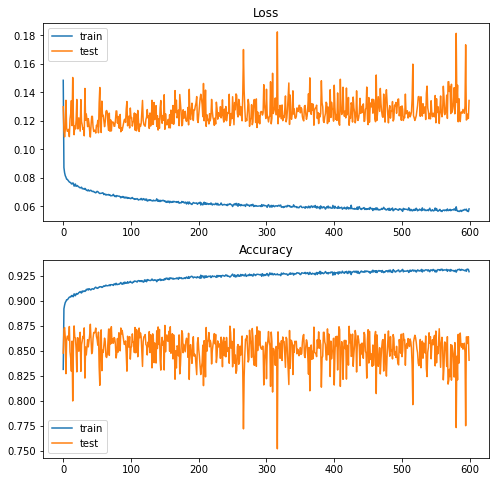

In [18]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = model8.evaluate(X_train, y_train, verbose=0)
_, test_acc = model8.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(8, 8))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# predict probabilities for test set
yhat_probs = model8.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model8.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy_score = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_score)
#print('Validation Accuracy: %f' % val_accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.840648
Precision: 0.189264
Recall: 0.121520
F1 score: 0.148009
ROC AUC: 0.603393
[[16427  1178]
 [ 1988   275]]
